## class:

In [8]:
class MyClass:
    className = '三年二班'
    
    def __init__(self, name):
        self.name = name
    
    def BaseInfo(self):
        baseInfo = 'My name is %s, I am a student in %s' % (self.name, MyClass.className)
        return baseInfo
    
    def ComeFrom(self, country, *args):
        baseInfo = self.BaseInfo()
        comeFrom = baseInfo + '. I come from ' + country + ',' + ','.join(args)
        return comeFrom

In [9]:
x = MyClass('张三')
print(x.ComeFrom('china', 'chengdu', 'gaoxinqu', 'maoyezhongxin'))

My name is 张三, I am a student in 三年二班. I come from china,chengdu,gaoxinqu,maoyezhongxin


## KNN

In [10]:
from sklearn import datasets
from collections import Counter  # 为了做投票
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # TODO
    dist = np.sqrt(sum((instance1 - instance2)**2))
    return dist
    
 
def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # TODO  返回testInstance的预测标签 = {0,1,2}
    distances = [euc_dis(x, testInstance) for x in X]
    kneighbors = np.argsort(distances)[:k]
    count = Counter(y[kneighbors])
    return count.most_common()[0][0]

# 预测结果。    
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
#accuracy_score(y_test, clf.predict(X_test))
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


In [11]:
y_train

array([1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       0, 2])

In [12]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0])

## Linear Regression

0.9999999999999999 -0.9499999999999997


/var/folders/nf/s3hrf4f94bx7d661b9kg76v80000gn/T/ipykernel_57601/1915131316.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y)[0]


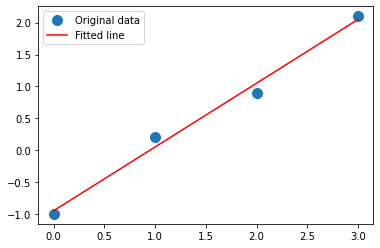

In [13]:
%matplotlib inline

import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print(m, c)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [19]:

from sklearn import linear_model
clf = linear_model.LinearRegression() # linear_model.LinearRegression(fit_intercept=False)
clf.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
clf.coef_

array([0.5, 0.5])

## Pyspark Transformation算子编程

In [38]:
from pyspark import SparkConf, SparkContext
if __name__ == '__main__':
    conf = SparkConf().setMaster("local[2]").setAppName("spark0401")
    sc = SparkContext(conf=conf)
    '''
    map:
        map(func)
        将func函数作用到数据集的每个元素上，生成一个新的分布式数据集返回
    '''
    print("***************************map***************************")
    def my_map():
        # 创建一个序列
        data = [1,2,3,4,5]
        # 将序列转换为RDD
        rdd1 = sc.parallelize(data)
        # 使用函数对RDD进行作用，生成RDD2
        rdd2 = rdd1.map(lambda x:x*2)
        # 使用collect()讲结果输出
        print(rdd2.collect())

    my_map()

    def my_map2():
        a = sc.parallelize(["dog","tiger","lion","cat","panter","eagle"])
        b = a.map(lambda x:(x,1)) #进来一个x，返回一个(x,1)的形式
        print(b.collect())
    my_map2()
    print("***************************filter***************************")
    def my_filter():
        #给一个数据
        data = [1,2,3,4,5]
        rdd1 = sc.parallelize(data)
        mapRdd = rdd1.map(lambda x:x**2)
        filterRdd = mapRdd.filter(lambda x:x>5)
        print(filterRdd.collect())
    '''
    filter:
        filter(func)
        返回所有func返回值为true的元素，生成一个新的分布式数据集返回
    '''
    def my_filter():
        data = [1,2,3,4,5]
        rdd1 = sc.parallelize(data)
        mapRdd = rdd1.map(lambda x:x*2)
        filterRdd = mapRdd.filter(lambda x:x > 5)
        print(filterRdd.collect())
        print(sc.parallelize(data).map(lambda x:x*2).filter(lambda x:x>5).collect())
    my_filter()
    print("***************************flatMap()***************************")
    #Wordcount第一步：
    def my_flatMap():
        #flatMap,将东西压扁/拆开 后做map
        data = ["hello spark","hello world","hello world"]
        rdd = sc.parallelize(data)
        print(rdd.flatMap(lambda line:line.split(" ")).collect())
    my_flatMap()
    print("***************************groupBy()***************************")
    def my_groupBy():
        data = ["hello spark","hello world","hello world"]
        rdd = sc.parallelize(data)
        mapRdd = rdd.flatMap(lambda line:line.split(" ")).map(lambda x:(x,1))
        groupByRdd = mapRdd.groupByKey()
        print(groupByRdd.collect())
        print(groupByRdd.map(lambda x:{x[0]:list(x[1])}).collect())

    my_groupBy()

    print("***************************reduceByKey()***************************")
    #出现Wordcount结果
    def my_reduceByKey():
        data = ["hello spark", "hello world", "hello world"]
        rdd = sc.parallelize(data)
        mapRdd = rdd.flatMap(lambda line: line.split(" ")).map(lambda x: (x, 1))
        reduceByKeyRdd = mapRdd.reduceByKey(lambda a,b:a+b)
        print(reduceByKeyRdd.collect())
    my_reduceByKey()

    print("***************************sortByKey()***************************")
    #将Wordcount结果中数字出现的次数进行降序排列
    def my_sort():
        data = ["hello spark", "hello world", "hello world"]
        rdd = sc.parallelize(data)
        mapRdd = rdd.flatMap(lambda line: line.split(" ")).map(lambda x: (x, 1))
        reduceByKeyRdd = mapRdd.reduceByKey(lambda a, b: a + b)
        #reduceByKeyRdd.sortByKey().collect() 此时是按照字典在排序
        #reduceByKeyRdd.sortByKey(False).collect()
        #先对对键与值互换位置，再排序，再换位置回来
        reduceByKey=reduceByKeyRdd.map(lambda x:(x[1],x[0])).sortByKey(False).map(lambda x:(x[1],x[0])).collect()
        print(reduceByKey)
    my_sort()

    print("***************************union()***************************")
    def my_union():
        a = sc.parallelize([1,2,3])
        b = sc.parallelize([3,4,5])
        U = a.union(b).collect()
        print(U)
    my_union()

    print("***************************union_distinct()***************************")
    def my_distinct():
        #这个和数学并集一样了
        a = sc.parallelize([1, 2, 3])
        b = sc.parallelize([3, 4, 2])
        D = a.union(b).distinct().collect()
        print(D)
    my_distinct()

    print("***************************join()***************************")
    def my_join():
        a = sc.parallelize([("A", "a1"), ("C", "c1"), ("D", "d1"), ("F", "f1"), ("F", "f2")])
        b = sc.parallelize([("A", "a2"), ("C", "c2"), ("C", "c3"), ("E", "e1")])
        J = a.fullOuterJoin(b).collect
        print(J)
    my_join()

    sc.stop()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/bin/spark-class: line 71: /Library/Java/JavaVirtualMachines/jdk1.8.0_202.jdk/bin/java: No such file or directory
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/bin/spark-class: line 96: CMD: bad array subscript
head: illegal line count -- -1


Exception: Java gateway process exited before sending its port number

## Pyspark download__ AKIRA

In [52]:
import pyspark

In [53]:

from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = SparkSession.builder.getOrCreate()

sdf = spark.read.csv("/Users/quzihanwu/Desktop/UoM_Year3/Machine Learning/A1:A2_test/A2/COMP30027_2021_Project2_datasets/recipe_train.csv", header=True)

sdf

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/bin/spark-class: line 71: /Library/Java/JavaVirtualMachines/jdk1.8.0_202.jdk/bin/java: No such file or directory
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/bin/spark-class: line 96: CMD: bad array subscript
head: illegal line count -- -1


Exception: Java gateway process exited before sending its port number

In [3]:
from pyspark import SparkContext

sc =SparkContext()
nums= sc.parallelize([1,2,3,4])
print(nums.take(1))
sc.stop
# [1]



/usr/local/lib/python3.9/site-packages/pyspark/bin/spark-class: line 111: /Users/quzihanwu/Desktop/同盾科技实习/bin/java: No such file or directory
/usr/local/lib/python3.9/site-packages/pyspark/bin/spark-class: line 111: exec: /Users/quzihanwu/Desktop/同盾科技实习/bin/java: cannot execute: No such file or directory


Exception: Java gateway process exited before sending its port number

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from os.path import getsize
from urllib.request import urlretrieve

output_dir = "../同盾科技实习"
fname_template = "yellow_tripdata_2015"

for m in range(1, 13):
    month = str(m).zfill(2)
    out = f'{fname_template}-{month}.csv'
    url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/{out}"
    urlretrieve(url, f"{output_dir}/{out}")

    print(f"Done downloading {out} to {output_dir} with size {getsize(f'{output_dir}/{out}') / 1073741824:.2f}GB")

KeyboardInterrupt: 

In [15]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = SparkSession.builder.getOrCreate()

sdf = spark.read.csv('../data/sample.csv', header=True)

sdf

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/bin/spark-class: line 71: /Library/Java/JavaVirtualMachines/jdk1.8.0_202.jdk/bin/java: No such file or directory
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/bin/spark-class: line 96: CMD: bad array subscript
head: illegal line count -- -1


Exception: Java gateway process exited before sending its port number

## Tensorflow 测试

In [33]:

import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

ModuleNotFoundError: No module named 'absl'

In [34]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')) > 0) # if True then you install everything correctly
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE") # double check

ModuleNotFoundError: No module named 'absl'

In [51]:
import tensorflow as tf

ModuleNotFoundError: No module named 'absl'

## 使用朴素贝叶斯过滤垃圾邮件

In [48]:
def textParse(bigString):
    import re
    # 使用正则表达式来切分句子，其中分隔符是除单词、数字外的任意字符串
    listOfTokens = re.split(r'\W*', bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]


def spamTest():

    docList = []
    classList = []
    fullText = []
    for i in range(1, 26):
        # 切分，解析数据，并归类为 1 类别
        wordList = textParse(open('data/4.NaiveBayes/email/spam/%d.txt' % i).read())
        docList.append(wordList)
        classList.append(1)
        # 切分，解析数据，并归类为 0 类别
        wordList = textParse(open('data/4.NaiveBayes/email/ham/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    # 创建词汇表    
    vocabList = createVocabList(docList)
    trainingSet = range(50)
    testSet = []
    # 随机取 10 个邮件用来测试
    for i in range(10):
        # random.uniform(x, y) 随机生成一个范围为 x - y 的实数
        randIndex = int(random.uniform(0, len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])
    trainMat = []
    trainClasses = []
    for docIndex in trainingSet:
        trainMat.append(setOfWords2Vec(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V, p1V, pSpam = trainNB0(array(trainMat), array(trainClasses))
    errorCount = 0
    for docIndex in testSet:
        wordVector = setOfWords2Vec(vocabList, docList[docIndex])
        if classifyNB(array(wordVector), p0V, p1V, pSpam) != classList[docIndex]:
            errorCount += 1
    print('the errorCount is: ', errorCount)
    print('the testSet length is :', len(testSet))
    print('the error rate is :', float(errorCount)/len(testSet))


# def testParseTest():
    # print(textParse(open('/desktop/1.rtf˜').read()))


In [49]:
print(textParse(open('/Users/quzihanwu/Desktop/1.rtf').read()))


[]


In [50]:
a = open('/Users/quzihanwu/Desktop/1.rtf').read()
a

'{\\rtf1\\ansi\\ansicpg936\\cocoartf2636\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fnil\\fcharset0 Monaco;}\n{\\colortbl;\\red255\\green255\\blue255;\\red65\\green65\\blue65;\\red246\\green246\\blue246;}\n{\\*\\expandedcolortbl;;\\cssrgb\\c32157\\c32157\\c32157;\\cssrgb\\c97255\\c97255\\c97255;}\n\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n\\deftab720\n\\pard\\pardeftab720\\partightenfactor0\n\n\\f0\\fs21\\fsmilli10800 \\cf2 \\cb3 \\expnd0\\expndtw0\\kerning0\n\\outl0\\strokewidth0 \\strokec2 Hi Peter,\\\n\\\nWith Jose out of town, do you want to\\\nmeet once in a while to keep things\\\ngoing and do some interesting stuff?\\\n\\\nLet me know\\\nEugene\\\nHi Peter,}'

## %run

In [54]:
%run '/Users/quzihanwu/Desktop/同盾科技实习/Hello TongDun.py'

Hello TongDun


In [55]:
%run '/Users/quzihanwu/Desktop/同盾科技实习/使用朴素贝叶斯过滤垃圾邮件.py'

[]


## Numpy

In [64]:
import numpy as np

### checking two arrays are equal or not

In [61]:

a = np.array([[1,2,3],[2,3,4]])
b = np.array([[2,4],[3,6]])

np.array_equal(a,b)

False

In [62]:
a

array([[1, 2, 3],
       [2, 3, 4]])

## Lydia‘s problem with her assignment 1 in ML

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
test_labels = ['white', 'green', 'blue', 'orange', 'white', 'red', 'red', 'gold', 'blue', 'green', 'blue', 'green', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'red', 'red', 'blue', 'blue', 'green', 'gold', 'red', 'white', 'white', 'white', 'red', 'red', 'gold', 'red', 'red', 'red', 'red', 'green', 'green', 'green']
predictions = ['red', 'blue', 'red', 'gold', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'green', 'blue', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'blue', 'red', 'white', 'red', 'gold', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'green', 'red', 'green', 'white', 'red', 'red', 'green', 'red', 'red']

In [54]:

# import matplotlib.pyplot as plt

# plt.figure(figsize = (10,5))
# plt.tick_params(pad=20)
# plt.title("Frequency of Actual and Predicted for knn_man_5 model", fontsize = 16)
# plt.hist([test_labels, predictions[1]], label = ['True', 'Predicted'], color = ['blue', 'red'], histtype = 'bar', align = 'left')
# plt.xlabel("Color", fontsize = 16)
# plt.ylabel("Frequency", fontsize = 16)
# plt.xticks(fontsize = 13)
# plt.yticks(fontsize = 13)
# plt.legend(loc = 'upper left', fontsize = 10)
# plt.show()

In [55]:
df = pd.DataFrame({'data': test_labels + predictions})
df['label'] = np.concatenate((
   np.repeat('test', len(test_labels)),
   np.repeat('pred', len(predictions))
))
df.tail()

,data,label
83,red,pred
84,red,pred
85,green,pred
86,red,pred
87,red,pred


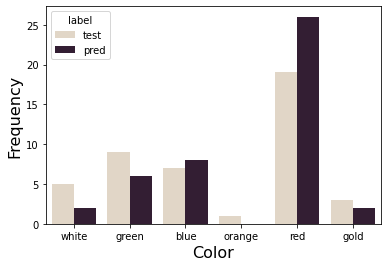

In [56]:
sns.countplot(x='data',
   hue = 'label',
   data=df,
   palette='ch:.25')
plt.xlabel("Color", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

## downloading by ADS_project_1

In [9]:
from os.path import getsize
from urllib.request import urlretrieve
import ssl
 
ssl._create_default_https_context = ssl._create_unverified_context


output_dir = "/Users/quzihanwu/Desktop/同盾科技实习"
fname_template = "yellow_tripdata_2018"

for m in range(7, 8):
    month = str(m).zfill(2)
    out = f'{fname_template}-{month}.csv'
    url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/{out}"
    urlretrieve(url, f"{output_dir}/{out}")

    print(f"Done downloading {out} to {output_dir} with size {getsize(f'{output_dir}/{out}') / 1073741824:.2f}GB")

Done downloading yellow_tripdata_2018-07.csv to /Users/quzihanwu/Desktop/同盾科技实习 with size 0.64GB


In [12]:
import pandas as pd

df = pd.read_csv('/Users/quzihanwu/Desktop/同盾科技实习/yellow_tripdata_2018-07.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-07-01 00:28:09,2018-07-01 00:28:51,1,5.30,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
1,1,2018-07-01 00:29:27,2018-07-01 00:30:17,1,5.30,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
2,1,2018-07-01 00:04:19,2018-07-01 00:08:29,2,0.70,1,N,211,144,1,5.0,0.5,0.5,1.25,0.0,0.3,7.55
3,1,2018-07-01 00:14:26,2018-07-01 00:36:35,1,4.80,1,N,144,142,1,18.0,0.5,0.5,1.00,0.0,0.3,20.30
4,1,2018-07-01 00:41:56,2018-07-01 00:50:54,1,1.80,1,N,142,141,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849743,2,2018-07-31 23:02:02,2018-07-31 23:06:52,1,1.28,1,N,141,75,1,6.0,0.5,0.5,0.00,0.0,0.3,7.30
7849744,2,2018-07-31 23:15:16,2018-07-31 23:20:52,1,1.60,1,N,263,238,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30
7849745,2,2018-07-31 23:33:14,2018-07-31 23:36:44,1,1.00,1,N,239,143,1,5.5,0.5,0.5,1.00,0.0,0.3,7.80
7849746,2,2018-07-31 23:47:08,2018-07-31 23:58:10,1,2.30,1,N,151,116,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80


## Apriori basic algorithm

In [14]:
def loadDataSet():
    return [[1,3,4],[2,3,5],[1,2,3,5],[2,5]]

def createC1(dataSet):
    C1=[]
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return list(map(frozenset,C1))

def scanD(D,CK,minSupport):
    ssCnt = {}
    for tid in D:
        for can in CK:
            if can.issubset(tid):
                if not can in ssCnt:ssCnt[can]=1
                else:ssCnt[can]+=1
    numItems = float(len(D))
    retList = []
    supportData={}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support>=minSupport:
            retList.insert(0,key)
        supportData[key]=support
    return retList,supportData

#频繁项集两两组合
def aprioriGen(Lk,k):
    retList=[]
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1,lenLk):
            L1=list(Lk[i])[:k-2];L2=list(Lk[j])[:k-2]
            L1.sort();L2.sort()
            if L1==L2:
                retList.append(Lk[i]|Lk[j])
    return retList

def apriori(dataSet,minSupport=0.5):
    C1=createC1(dataSet)
    D=list(map(set,dataSet))
    L1,supportData =scanD(D,C1,minSupport)
    L=[L1]
    k=2
    while(len(L[k-2])>0):
        CK = aprioriGen(L[k-2],k)
        Lk,supK = scanD(D,CK,minSupport)
        supportData.update(supK)
        L.append(Lk)
        k+=1
    return L,supportData

#规则计算的主函数
def generateRules(L,supportData,minConf=0.7):
    bigRuleList = []
    for i in range(1,len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if(i>1):
                rulesFromConseq(freqSet,H1,supportData,bigRuleList,minConf)
            else:
                calcConf(freqSet,H1,supportData,bigRuleList,minConf)
    return bigRuleList

def calcConf(freqSet,H,supportData,brl,minConf=0.7):
    prunedH=[]
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq]
        if conf>=minConf:
            print (freqSet-conseq,'--->',conseq,'conf:',conf)
            brl.append((freqSet-conseq,conseq,conf))
            prunedH.append(conseq)
    return prunedH
def rulesFromConseq(freqSet,H,supportData,brl,minConf=0.7):
    m = len(H[0])
    if (len(freqSet)>(m+1)):
        Hmp1 = aprioriGen(H,m+1)
        Hmp1 = calcConf(freqSet,Hmp1,supportData,brl,minConf)
        if(len(Hmp1)>1):
            rulesFromConseq(freqSet,Hmp1,supportData,brl,minConf)


if __name__=='__main__':
    dataSet=loadDataSet()
    L,supportData=apriori(dataSet)
    rules = generateRules(L,supportData,minConf=0.7)

frozenset({5}) ---> frozenset({2}) conf: 1.0
frozenset({2}) ---> frozenset({5}) conf: 1.0
frozenset({1}) ---> frozenset({3}) conf: 1.0


In [32]:
# 计算可信度（confidence）
def calcConf(freqSet, H
, supportData, brl, minConf=0.7):
    """calcConf（对两个元素的频繁项，计算可信度，例如:  {1,2}/{1} 或者 {1,2}/{2} 看是否满足条件）

    Args:
        freqSet 频繁项集中的元素，例如: frozenset([1, 3])    
        H 频繁项集中的元素的集合，例如: [frozenset([1]), frozenset([3])]
        supportData 所有元素的支持度的字典
        brl 关联规则列表的空数组
        minConf 最小可信度
    Returns:
        prunedH 记录 可信度大于阈值的集合
    """
    # 记录可信度大于最小可信度（minConf）的集合
    prunedH = []
    for conseq in H: # 假设 freqSet = frozenset([1, 3]), H = [frozenset([1]), frozenset([3])]，那么现在需要求出 frozenset([1]) -> frozenset([3]) 的可信度和 frozenset([3]) -> frozenset([1]) 的可信度

        # print 'confData=', freqSet, H, conseq, freqSet-conseq
        conf = supportData[freqSet]/supportData[freqSet-conseq] # 支持度定义: a -> b = support(a | b) / support(a). 假设  freqSet = frozenset([1, 3]), conseq = [frozenset([1])]，那么 frozenset([1]) 至 frozenset([3]) 的可信度为 = support(a | b) / support(a) = supportData[freqSet]/supportData[freqSet-conseq] = supportData[frozenset([1, 3])] / supportData[frozenset([1])]
        if conf >= minConf:
            # 只要买了 freqSet-conseq 集合，一定会买 conseq 集合（freqSet-conseq 集合和 conseq 集合是全集）
            print (freqSet-conseq, '-->', conseq, 'conf:', conf)
            brl.append((freqSet-conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

# 递归计算频繁项集的规则
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.7):
    """rulesFromConseq

    Args:
        freqSet 频繁项集中的元素，例如: frozenset([2, 3, 5])    
        H 频繁项集中的元素的集合，例如: [frozenset([2]), frozenset([3]), frozenset([5])]
        supportData 所有元素的支持度的字典
        brl 关联规则列表的数组
        minConf 最小可信度
    """
    # H[0] 是 freqSet 的元素组合的第一个元素，并且 H 中所有元素的长度都一样，长度由 aprioriGen(H, m+1) 这里的 m + 1 来控制
    # 该函数递归时，H[0] 的长度从 1 开始增长 1 2 3 ...
    # 假设 freqSet = frozenset([2, 3, 5]), H = [frozenset([2]), frozenset([3]), frozenset([5])]
    # 那么 m = len(H[0]) 的递归的值依次为 1 2
    # 在 m = 2 时, 跳出该递归。假设再递归一次，那么 H[0] = frozenset([2, 3, 5])，freqSet = frozenset([2, 3, 5]) ，没必要再计算 freqSet 与 H[0] 的关联规则了。
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        print ('freqSet******************', len(freqSet), m + 1, freqSet, H, H[0])
        # 生成 m+1 个长度的所有可能的 H 中的组合，假设 H = [frozenset([2]), frozenset([3]), frozenset([5])]
        # 第一次递归调用时生成 [frozenset([2, 3]), frozenset([2, 5]), frozenset([3, 5])]
        # 第二次 。。。没有第二次，递归条件判断时已经退出了
        Hmp1 = aprioriGen(H, m+1)
        # 返回可信度大于最小可信度的集合
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        print ('Hmp1=', Hmp1)
        print ('len(Hmp1)=', len(Hmp1), 'len(freqSet)=', len(freqSet))
        # 计算可信度后，还有数据大于最小可信度的话，那么继续递归调用，否则跳出递归
        if (len(Hmp1) > 1):
            print ('----------------------', Hmp1)
            # print len(freqSet),  len(Hmp1[0]) + 1
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

# 生成关联规则
def generateRules(L, supportData, minConf=0.7):
    """generateRules

    Args:
        L 频繁项集列表
        supportData 频繁项集支持度的字典
        minConf 最小置信度
    Returns:
        bigRuleList 可信度规则列表（关于 (A->B+置信度) 3个字段的组合）
    """
    bigRuleList = []
    # 假设 L = [[frozenset([1]), frozenset([3]), frozenset([2]), frozenset([5])], [frozenset([1, 3]), frozenset([2, 5]), frozenset([2, 3]), frozenset([3, 5])], [frozenset([2, 3, 5])]]
    for i in range(1, len(L)):
        # 获取频繁项集中每个组合的所有元素
        for freqSet in L[i]:
            # 假设: freqSet= frozenset([1, 3]), H1=[frozenset([1]), frozenset([3])]
            # 组合总的元素并遍历子元素，并转化为 frozenset 集合，再存放到 list 列表中
            H1 = [frozenset([item]) for item in freqSet]
            # 2 个的组合，走 else, 2 个以上的组合，走 if
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

In [23]:
supportData = [[1,3,4],[2,3,5],[1,2,3,5],[2,5]]
L = [[2,3,5]]

In [24]:
generateRules(L, supportData, minConf=0.7)

[]

In [33]:
#-*- coding: UTF-8 -*-

# 加载数据
def loadDataSet():
    return [[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5],[3,1,5,2],[1,2,3]]

# 将所有元素转换为frozenset型字典，存放到列表中
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:        #去重得到单元素项
                C1.append([item])
    C1.sort()                           #排序

    return list(map(frozenset, C1))  # 使用frozenset是为了后面可以将这些值作为字典的键 frozenset一种不可变的集合，set可变集合


# 过滤掉支持度不符合的集合 即剪枝
def scanD(D, Ck, minSupport):
    ssCnt = {}                      #建立字典存储各项及数目
    for tid in D:
        for can in Ck:
            if can.issubset(tid):  # 判断can是否是tid的《子集》 （这里使用子集的方式来判断两者的关系）
                ssCnt[can] = ssCnt.get(can,0)+1   #读取字典 存在can得到数值 不存在得到零 在取到的值加1 .get(要取的值，没有返回的值)
    retList = []  # 记录支持度大于给定值的数据
    supportData = {}  # 每个数据值的支持度
    for key in ssCnt:
        support = ssCnt[key] / len(D)     #计算支持度
        if support >= minSupport:           #和给定支持度比较
            retList.append(key);supportData[key] = support  #将符合支持度条件的数据存储
    return retList, supportData  # 排除不符合支持度元素后的元素 每个元素支持度# 返回频繁项集列表retList 所有元素的支持度字典


# 生成所有可以组合的集合
# 频繁项集列表Lk
# 连接后项集元素个数k  [frozenset({2, 3}), frozenset({3, 5})] -> [frozenset({2, 3, 5})]
def aprioriGen(Lk, k):
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):  # 两层循环比较Lk中的每个元素与其它元素
        for j in range(i + 1, lenLk):
            L1 = list(Lk[i])[:k - 2]  # 将集合转为list后 取0-k-2
            L2 = list(Lk[j])[:k - 2]
            L1.sort();
            L2.sort()
            if L1 == L2:# 该函数每次比较两个list的前k-2个元素，如果相同则求并集得到k个元素的集合
                retList.append(Lk[i] | Lk[j])  # 求并集python求并集符号|
    return retList  # 返回连接后的项集


# 调用上述函数
# 返回 所有满足大于阈值的组合 集合支持度列表
def apriori(dataSet, minSupport):
    D = list(map(set, dataSet))  # 转换列表记录为字典  [{1, 3, 4}, {2, 3, 5}, {1, 2, 3, 5}, {2, 5}]
    C1 = createC1(dataSet)  # 将每个元素转会为frozenset字典    [frozenset({1}), frozenset({2}), frozenset({3}), frozenset({4}), frozenset({5})]
    L1, supportData = scanD(D, C1, minSupport)  # 过滤数据
    L = [L1]   #频繁项集的集合
    k = 2
    while (len(L[k-2]) > 0):  # 若仍有满足支持度的集合则继续做关联分析
        Ck = aprioriGen(L[k-2], k)  # Ck候选频繁项集
        Lk, supK = scanD(D, Ck, minSupport)  # Lk频繁项集 supk支持度
        L.append(Lk)  # 更新L集合
        supportData.update(supK)   # 更新字典（把新出现的集合:支持度加入到supportData中）
        k=k+1  # 每次新组合的元素都只增加了一个，所以k也+1（k表示元素个数）
    support = {}
    for i in L[k - 3]:     #遍历符合支持度元素最多的项
        support[i] = supportData.get(i)   #从字典中取出项及其支持度
    return support   #返回项及其支持度

if __name__ == '__main__':
    while int(input('请输入序号：1 测试 0 退出\n')):
        print('输入支持度(0->1)')
        support = float(input())
        print(support)        #定义float型输入支持度
        supp= apriori(loadDataSet(),support)
        print(supp)                  #打印结果



输入支持度(0->1)
0.676
{frozenset({3}): 0.8333333333333334, frozenset({2}): 0.8333333333333334}
输入支持度(0->1)
0.916
{}
输入支持度(0->1)
0.456
{frozenset({2, 3, 5}): 0.5, frozenset({1, 2, 3}): 0.5}
输入支持度(0->1)
0.637
{frozenset({1, 3}): 0.6666666666666666, frozenset({2, 3}): 0.6666666666666666, frozenset({2, 5}): 0.6666666666666666}


## FP-algorithm

In [10]:
# FP_tree的类定义
class treeNode:
    def __init__(self, nameValue, numOccur, parentNode):
        self.name = nameValue #节点名字
        self.count = numOccur #节点计数值
        self.nodeLink = None #用于链接相似的元素项
        self.parent = parentNode      #needs to be updated
        self.children = {} #子节点

    def inc(self, numOccur):
        '''
        对count变量增加给定值
        '''
        self.count += numOccur

    def disp(self, ind=1):
        '''
        将树以文本形式展示
        '''
        print ('  '*ind, self.name, ' ', self.count)
        for child in self.children.values():
            child.disp(ind+1)

# FP_tree构建函数
def createTree(dataSet, minSup=1):
    '''
    创建FP树
    '''
    headerTable = {}
    #第一次扫描数据集
    for trans in dataSet:#计算item出现频数
        for item in trans:
            headerTable[item] = headerTable.get(item, 0) + dataSet[trans]
    headerTable = {k:v for k,v in headerTable.items() if v >= minSup}
    freqItemSet = set(headerTable.keys())
    #print ('freqItemSet: ',freqItemSet)
    if len(freqItemSet) == 0: return None, None  #如果没有元素项满足要求，则退出
    for k in headerTable:
        headerTable[k] = [headerTable[k], None] #初始化headerTable
    #print ('headerTable: ',headerTable)
    #第二次扫描数据集
    retTree = treeNode('Null Set', 1, None) #创建树
    for tranSet, count in dataSet.items():  
        localD = {}
        for item in tranSet:  #put transaction items in order
            if item in freqItemSet:
                localD[item] = headerTable[item][0]
        if len(localD) > 0:
            orderedItems = [v[0] for v in sorted(localD.items(), key=lambda p: p[1], reverse=True)]
            updateTree(orderedItems, retTree, headerTable, count)#将排序后的item集合填充的树中
    return retTree, headerTable #返回树型结构和头指针表

def updateTree(items, inTree, headerTable, count):
    if items[0] in inTree.children:#检查第一个元素项是否作为子节点存在
        inTree.children[items[0]].inc(count) #存在，更新计数
    else:   #不存在，创建一个新的treeNode,将其作为一个新的子节点加入其中
        inTree.children[items[0]] = treeNode(items[0], count, inTree)
        if headerTable[items[0]][1] == None: #更新头指针表
            headerTable[items[0]][1] = inTree.children[items[0]]
        else:
            updateHeader(headerTable[items[0]][1], inTree.children[items[0]])
    if len(items) > 1:#不断迭代调用自身，每次调用都会删掉列表中的第一个元素
        updateTree(items[1::], inTree.children[items[0]], headerTable, count)

def updateHeader(nodeToTest, targetNode):
    '''
    this version does not use recursion
    Do not use recursion to traverse a linked list!
    更新头指针表，确保节点链接指向树中该元素项的每一个实例
    '''
    while (nodeToTest.nodeLink != None):    
        nodeToTest = nodeToTest.nodeLink
    nodeToTest.nodeLink = targetNode

# 抽取条件模式基
def ascendTree(leafNode, prefixPath): #迭代上溯整棵树
    if leafNode.parent != None:
        prefixPath.append(leafNode.name)
        ascendTree(leafNode.parent, prefixPath)

def findPrefixPath(basePat, treeNode): #treeNode comes from header table
    condPats = {}
    while treeNode != None:
        prefixPath = []
        ascendTree(treeNode, prefixPath)
        if len(prefixPath) > 1: 
            condPats[frozenset(prefixPath[1:])] = treeNode.count
        treeNode = treeNode.nodeLink
    return condPats

# 递归查找频繁项集
def mineTree(inTree, headerTable, minSup, preFix, freqItemList):
    bigL = [v[0] for v in sorted(headerTable.items(), key=lambda p: p[1][0])]# 1.排序头指针表
    for basePat in bigL:  #从头指针表的底端开始
        newFreqSet = preFix.copy()
        newFreqSet.add(basePat)
        print ('finalFrequent Item: ',newFreqSet)    #添加的频繁项列表
        freqItemList.append(newFreqSet)
        condPattBases = findPrefixPath(basePat, headerTable[basePat][1])
        print ('condPattBases :',basePat, condPattBases)
        # 2.从条件模式基创建条件FP树
        myCondTree, myHead = createTree(condPattBases, minSup)
#         print ('head from conditional tree: ', myHead)
        if myHead != None: # 3.挖掘条件FP树
            print ('conditional tree for: ',newFreqSet)
            myCondTree.disp(1)            
            mineTree(myCondTree, myHead, minSup, newFreqSet, freqItemList)

In [12]:
# 测试1
def loadSimpDat():
    simpDat = [
                ['I1','I2','I5'],
                ['I2','I4'],
                ['I2','I3'],
                ['I1','I2','I4'],
                ['I1','I3'],
                ['I2','I3'],
                ['I1','I3'],
                ['I1','I2','I3','I5'],
                ['I1','I2','I3']
              ]
    return simpDat

def createInitSet(dataSet):  
    retDict = {}  
    for trans in dataSet:  
        retDict[frozenset(trans)] = retDict.get(frozenset(trans), 0) + 1 #若没有相同事项，则为1；若有相同事项，则加1  
    return retDict

minSup = 2
simpDat = loadSimpDat()
initSet = createInitSet(simpDat)
myFPtree, myHeaderTab = createTree(initSet, minSup)
myFPtree.disp()
myFreqList = []
mineTree(myFPtree, myHeaderTab, minSup, set([]), myFreqList)

myFreqList

   Null Set   1
     I2   7
       I1   2
         I5   1
         I4   1
       I4   1
       I3   4
         I1   2
           I5   1
     I3   2
       I1   2
finalFrequent Item:  {'I5'}
condPattBases : I5 {frozenset({'I2', 'I1'}): 1, frozenset({'I3', 'I2', 'I1'}): 1}
conditional tree for:  {'I5'}
   Null Set   1
     I2   2
       I1   2
finalFrequent Item:  {'I5', 'I2'}
condPattBases : I2 {}
finalFrequent Item:  {'I5', 'I1'}
condPattBases : I1 {frozenset({'I2'}): 2}
conditional tree for:  {'I5', 'I1'}
   Null Set   1
     I2   2
finalFrequent Item:  {'I5', 'I2', 'I1'}
condPattBases : I2 {}
finalFrequent Item:  {'I4'}
condPattBases : I4 {frozenset({'I2'}): 1, frozenset({'I2', 'I1'}): 1}
conditional tree for:  {'I4'}
   Null Set   1
     I2   2
finalFrequent Item:  {'I4', 'I2'}
condPattBases : I2 {}
finalFrequent Item:  {'I1'}
condPattBases : I1 {frozenset({'I2'}): 2, frozenset({'I3'}): 2, frozenset({'I3', 'I2'}): 2}
conditional tree for:  {'I1'}
   Null Set   1
     I2   2
     I3 

[{'I5'},
 {'I2', 'I5'},
 {'I1', 'I5'},
 {'I1', 'I2', 'I5'},
 {'I4'},
 {'I2', 'I4'},
 {'I1'},
 {'I1', 'I2'},
 {'I1', 'I2', 'I3'},
 {'I1', 'I3'},
 {'I3'},
 {'I2', 'I3'},
 {'I2'}]

In [13]:
# 测试2
def loadSimpDat():
    simpDat = [['r', 'z', 'h', 'j', 'p'],
               ['z', 'y', 'x', 'w', 'v', 'u', 't', 's'],
               ['z'],
               ['r', 'x', 'n', 'o', 's'],
            #    ['r', 'x', 'n', 'o', 's'],
               ['y', 'r', 'x', 'z', 'q', 't', 'p'],
               ['y', 'z', 'x', 'e', 'q', 's', 't', 'm']]
    return simpDat

def createInitSet(dataSet):  
    retDict = {}  
    for trans in dataSet:  
        retDict[frozenset(trans)] = retDict.get(frozenset(trans), 0) + 1 #若没有相同事项，则为1；若有相同事项，则加1  
    return retDict

minSup = 2
simpDat = loadSimpDat()
initSet = createInitSet(simpDat)
myFPtree, myHeaderTab = createTree(initSet, minSup)
myFPtree.disp()
myFreqList = []
mineTree(myFPtree, myHeaderTab, minSup, set([]), myFreqList)

myFreqList

   Null Set   1
     z   5
       r   1
         p   1
       x   3
         s   2
           y   2
             t   2
               q   1
         y   1
           r   1
             t   1
               q   1
                 p   1
     x   1
       s   1
         r   1
finalFrequent Item:  {'p'}
condPattBases : p {frozenset({'z', 'r'}): 1, frozenset({'y', 'q', 'x', 'r', 't', 'z'}): 1}
conditional tree for:  {'p'}
   Null Set   1
     z   1
       r   1
     r   1
       z   1
finalFrequent Item:  {'p', 'z'}
condPattBases : z {frozenset({'r'}): 1}
finalFrequent Item:  {'p', 'r'}
condPattBases : r {frozenset({'z'}): 1}
finalFrequent Item:  {'q'}
condPattBases : q {frozenset({'y', 'x', 'r', 't', 'z'}): 1, frozenset({'s', 'y', 'x', 't', 'z'}): 1}
conditional tree for:  {'q'}
   Null Set   1
     y   2
       x   2
         t   2
           z   2
finalFrequent Item:  {'q', 'y'}
condPattBases : y {}
finalFrequent Item:  {'q', 'x'}
condPattBases : x {frozenset({'y'}): 2}
conditional tree 

[{'p'},
 {'p', 'z'},
 {'p', 'r'},
 {'q'},
 {'q', 'y'},
 {'q', 'x'},
 {'q', 'x', 'y'},
 {'q', 't'},
 {'q', 't', 'y'},
 {'q', 't', 'x'},
 {'q', 't', 'x', 'y'},
 {'q', 'z'},
 {'q', 't', 'z'},
 {'q', 'y', 'z'},
 {'q', 't', 'y', 'z'},
 {'q', 'x', 'z'},
 {'q', 't', 'x', 'z'},
 {'q', 'x', 'y', 'z'},
 {'q', 't', 'x', 'y', 'z'},
 {'r'},
 {'r', 'z'},
 {'r', 'x'},
 {'s'},
 {'s', 'z'},
 {'s', 'x', 'z'},
 {'s', 'x'},
 {'y'},
 {'s', 'y'},
 {'s', 'y', 'z'},
 {'s', 'x', 'y'},
 {'s', 'x', 'y', 'z'},
 {'y', 'z'},
 {'x', 'y'},
 {'x', 'y', 'z'},
 {'t'},
 {'s', 't'},
 {'s', 't', 'z'},
 {'s', 't', 'y'},
 {'s', 't', 'y', 'z'},
 {'s', 't', 'x'},
 {'s', 't', 'x', 'z'},
 {'s', 't', 'x', 'y'},
 {'s', 't', 'x', 'y', 'z'},
 {'t', 'z'},
 {'t', 'y'},
 {'t', 'y', 'z'},
 {'t', 'x'},
 {'t', 'x', 'z'},
 {'t', 'x', 'y'},
 {'t', 'x', 'y', 'z'},
 {'x'},
 {'x', 'z'},
 {'z'}]

## BFS and DFS

In [7]:
graph = {
   'A': ['B','C'],
   'B': ['A','C','D'],
   'C': ['A','B','D','E'],
   'D': ['B','C','E','F'],
   'E': ['C','D'],
   'F': ['D']
}

def BFS(graph, start):
   queue = []
   queue.append(start)
   seen = set()
   seen.add(start)

   while(len(queue) > 0):
      vertex = queue.pop(0)
      nodes = graph[vertex]
      for w in nodes:
         if w not in seen:
            queue.append(w)
            seen.add(w)
      print(vertex)

def DFS(graph, start):
   stack = []
   stack.append(start)
   seen = set()
   seen.add(start)

   while(len(stack) > 0):
      vertex = stack.pop()
      nodes = graph[vertex]
      for w in nodes:
         if w not in seen:
            stack.append(w)
            seen.add(w)
      print(vertex)

BFS(graph, 'A')
print('new line')
DFS(graph, 'A')

A
B
C
D
E
F
new line
A
C
E
D
F
B


## Github readme file

In [4]:
<!-- <p align="left" margin> <img src="https://komarev.com/ghpvc/?username=chuangyu-hscy&label=Profile%20views&color=fd428d&style=badge" alt="chuangyu-hscy" /></p> -->

<!-- title/welcome words -->
<!-- <h1 align='center'>~ Hello (ฅ'ω'ฅ) ~ <br /> This is Rin Huang</h1>
 -->


<div align='center'><img src="https://capsule-render.vercel.app/api?type=waving&color=9be9e4&height=150&section=header&text=~%Hello %(ฅ'ω'ฅ)% ~%20 This %is % Rin %Huang&fontSize=25&fontColor=fff" width='650' /></div>



<!-- social media links -->
<div align='center'>
  <img width=30 src="https://c.tenor.com/CsqnkjKnojgAAAAi/dm4uz3-foekoe.gif" />
  <a href='https://www.github.com/chuangyu-hscy'><img height=25 src='https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white' /></a>
  <a href="https://www.instagram.com/chuangyu_hscy/" target="_blank"><img height='25' src="https://img.shields.io/badge/-Instagram-%23E4405F?style=for-the-badge&logo=instagram&logoColor=white" target="_blank"></a>
  <a href='https://www.linkedin.com/in/chuangyu-hscy/' alt='rin huang linkedin'><img src='https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white' alt='linkedin link' height='25' /></a>
<!--   <a href='https://www.instagram.com/chuangyu_hscy/' alt='rin huang instagram'><img src='https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white' alt='instagram' height='25'></a> -->
  <a href="https://www.overleaf.com/read/crhyszcrnykm" alt=""><img src="https://img.shields.io/badge/Overleaf-47A141?style=for-the-badge&logo=Overleaf&logoColor=white" alt='overleaf' height='25' /></a>
 <a href="https://discord.gg/U6uYEfBjqX" target="_blank"><img height='25' src="https://img.shields.io/badge/Discord-7289DA?style=for-the-badge&logo=discord&logoColor=white" target="_blank"></a> 
  <a href = "mailto:huang@rin.contact"><img height='25' src="https://img.shields.io/badge/-Gmail-%23333?style=for-the-badge&logo=gmail&logoColor=white" target="_blank"></a>
</div>

<br />
<!-- short description -->
<p align='center'><img src='https://c.tenor.com/DehpokEAjJEAAAAi/cat-loading.gif' width=50/> A Data Science student study in the <a href='https://www.unimelb.edu.au/' alt='unimelb'>Unimelb</a> <img src='https://c.tenor.com/nwE8h9HLqZUAAAAj/flag-country.gif' width=20 /> </p>
<br />

<!-- github stats -->

<div align='center'>
  <img src='https://github-readme-stats.vercel.app/api?username=chuangyu-hscy&show_icons=true&count_private=true&theme=radical' alt='github stats' height=125>
  <img  height='125' src="https://github-readme-streak-stats.herokuapp.com/?user=chuangyu-hscy&theme=radical" alt="chuangyu-hscy" />
</div>

<br />
<!-- <div align='center'>
  <img width='275' src="https://github-readme-stats.vercel.app/api/top-langs/?username=chuangyu-hscy&layout=compact&langs_count=7&theme=radical"/>
</div> -->
 
<!-- 
<div align='center'><img src='https://github-profile-summary-cards.vercel.app/api/cards/profile-details?username=chuangyu-hscy&theme=monokai' alt='github stats' width='350'></div> -->

<div align='center' text-content='justify' >  
  <p>Interesting and passionating in data science <img src='https://c.tenor.com/1vhgkHU7lI0AAAAi/takodachi-ina.gif' width=45/></p>
  <p>Wanna use data improve people's lives ♬ヽ(*・ω・)ﾉ  </p>
</div>
<br />
 
<div align='center'>
<img width='650' align='center' src="https://github.com/chuangyu-hscy/chuangyu-hscy/blob/output/github-contribution-grid-snake.svg" alt='snake animation' />

<!-- <img width=100  src="https://c.tenor.com/cBiRfjAlMgYAAAAi/bongocat-happy.gif" align='center'/> -->

<br />
<img src='https://c.tenor.com/3-zt2Wtxch4AAAAC/rainbow-rainbow-bar.gif' width=650 align='center' height=2>
    

<b><p align='center'>SEE PINNED REPOS <img align='center' src="https://c.tenor.com/k2GZAYWuTS4AAAAi/backhand-index-pointing-down-joypixels.gif" width=45 /></p></b>
</div>


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [5]:
<!-- <p align="left" margin> <img src="https://komarev.com/ghpvc/?username=chuangyu-hscy&label=Profile%20views&color=fd428d&style=badge" alt="chuangyu-hscy" /></p> -->
<!-- title/welcome words -->
<!-- <h1 align='center'> Hello ~ <br /> This is QUZIHAN WU 邬屈子涵</h1>
 -->
<div align='center'><img src="https://capsule-render.vercel.app/api?type=waving&color=E9CDF5&height=150&section=header&text=Hello ~%20 This %is % QUZIHAN %WU %邬屈子涵&fontSize=25&fontColor=666666" width='650' /></div>


<!-- social media links -->
<div align='center'>
  <img width=30 src="https://c.tenor.com/CsqnkjKnojgAAAAi/dm4uz3-foekoe.gif" />
  <a href='https://github.com/QUZIHANWU?tab=projects'><img height=25 src='https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white' /></a>
  <a href="https://www.instagram.com/marzeguptreetin/" target="_blank"><img height='25' src="https://img.shields.io/badge/-Instagram-%23E4405F?style=for-the-badge&logo=instagram&logoColor=white" target="_blank"></a>
  <a href='https://www.linkedin.cn/injobs/in/%E5%AD%90%E6%B6%B5-%E9%82%AC%E5%B1%88-868463210' alt='rin huang linkedin'><img src='https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white' alt='linkedin link' height='25' /></a>
<!--   <a href='https://www.instagram.com/marzeguptreetin/' alt='marzeguptreetin instagram'><img src='https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white' alt='instagram' height='25'></a> -->
  <a href = "quzihanwu.0712@gmail.com"><img height='25' src="https://img.shields.io/badge/-Gmail-%23333?style=for-the-badge&logo=gmail&logoColor=white" target="_blank"></a>
  <a href="https://discord.com/channels/@me" target="_blank"><img height='25' src="https://img.shields.io/badge/Discord-7289DA?style=for-the-badge&logo=discord&logoColor=white" target="_blank"></a> 
</div>


<br />
<!-- short description -->
<p align='center'> A Data Science student study in the <a href='https://www.unimelb.edu.au/' alt='unimelb'>Unimelb</a> <img src='https://c.tenor.com/nwE8h9HLqZUAAAAj/flag-country.gif' width=20 /> </p>
<p align='center'> Currently, work in the <a href='https://www.tongdun.cn/?r=pp' alt='杭州同盾科技'>杭州同盾科技</a> <img src='https://tenor.com/view/china-flag-gif-11411743' width=20 /> </p>
<br />


SyntaxError: invalid syntax (338111843.py, line 1)

In [6]:
<div align="center">
<span>  </span>
<img height="170px" src="https://github-readme-stats.vercel.app/api?username=Achuan-2" /><span>  </span><img height="170px" src="https://github-readme-stats.vercel.app/api/top-langs/?username=Achuan-2&layout=compact&langs_count=8" />
<span>  </span>
</div>


SyntaxError: invalid syntax (1672584770.py, line 1)